In [45]:
import os
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [46]:
dataroot = Path("./assets/preprocessed")
#train_path = dataroot / "Train_nus-wide.ndjson"
test_path = dataroot / "Test_nus-wide.ndjson"

In [47]:
test = pl.read_ndjson(test_path)
tsample = test
tsample = tsample.filter(pl.col("tags").list.len() > 3)
tsample = tsample.sample(4, seed=39)
tsample.glimpse()

Rows: 4
Columns: 4
$ file_name        <str> '0387_171311723.jpg', '0390_1807932052.jpg', '0326_2133395598.jpg', '0587_1909861838.jpg'
$ labels     <list[str]> ['clouds', 'sunset', 'beach', 'ocean', 'square', 'waves', 'pacific', 'pier'], ['clouds', 'architecture', 'street', 'urban', 'australia', 'buildings', 'tower', 'cityscape', 'victoria', 'monochrome', 'melbourne', 'skyscraper', 'cafe'], ['sky', 'clouds', 'white', 'art', 'city', 'black', 'street', 'urban', 'woman', 'car', 'australia', 'road', 'buildings', 'person', 'industrial', 'south', 'monochrome', 'houses', 'mural'], ['nature', 'sky', 'clouds', 'bravo', 'landscape', 'lake', 'mountain', 'morning', 'mosque', 'islam', 'malaysia']
$ tags       <list[str]> ['beach', 'clouds', 'ocean', 'sunset'], ['buildings', 'cityscape', 'clouds', 'street', 'tower'], ['buildings', 'clouds', 'person', 'road', 'sky', 'street'], ['clouds', 'lake', 'mountain', 'sky']
$ image_root       <str> './assets/nus-wide/images', './assets/nus-wide/images', './asse

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 19.35it/s]


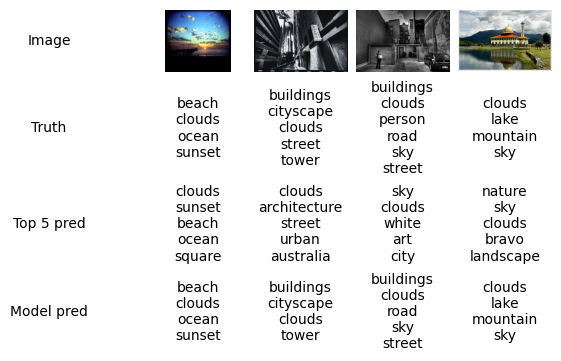

In [48]:
from scripts.test.compose import trainer, model, data
os.environ["SPECIFIC_IMGS"] = ",".join(tsample["file_name"])

alignment = {"verticalalignment": "center", "horizontalalignment": "center"}

preds = trainer.predict(model, datamodule=data)
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(5.5, 3.5), layout="constrained")
for ax in axs.ravel():
    ax.set_axis_off()
for i, txt in enumerate(["Image", "Truth", "Top 5 pred", "Model pred"]):
    axs[i,0].text(0, 0.5, txt, **alignment)
for i, path in enumerate(tsample["file_name"]):
    img_path = Path(tsample["image_root"][i], path)
    img = plt.imread(img_path)
    axs[0,i+1].imshow(img)
    axs[1,i+1].text(0.5, 0.5, "\n".join(tsample["tags"][i]), **alignment)
    axs[2,i+1].text(0.5, 0.5, "\n".join(tsample["labels"][i][:5]), **alignment)
    axs[3,i+1].text(0.5, 0.5, "\n".join(preds[0][i] if len(preds[0][i]) > 0 else ["-"]), **alignment)